# MILLER EDUARDO PERDOMO TRUJILLO, JUAN JOSÉ RESTREPO ROSERO 

DATOS SELECCIONADOS: Wine Quality

1. CONOCIENDO LOS DATOS

 A. Identificar número de muestras y atributos.

 B. Identificar el tipo de cada atributo.

 C. Calcular medidas de centralidad y dispersión por cada atributo de acuerdo a su tipo (hacer gráfico de cajas y bigotes por atributo, diagrama de dispersión u otro diagrama acorde al tipo del atributo que ilustre el comportamiento de los datos).

 D. Calcular la matriz de correlación entre los atributos de entrada.

 E. Determinar el grado de balanceo entre los valores del atributo objetivo.

 F. Identificar número de datos faltantes por clase.

 G. Identificar número de datos atípicos por clase. Para esto, te recomendamos que explores la librería https://github.com/yzhao062/pyod que implementa distintas metodologías de identificación de datos atípicos.




In [55]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
import requests
from io import BytesIO

# URL del dataset
url = "https://archive.ics.uci.edu/static/public/186/wine+quality.zip"

# Descargar el archivo ZIP
response = requests.get(url)
zip_file = zipfile.ZipFile(BytesIO(response.content))

# Extraer y leer los archivos CSV
with zip_file.open('winequality-white.csv') as red_file:
    w_wine = pd.read_csv(red_file, sep=';')
w_wine.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [56]:
shape = w_wine.shape
shape

(4898, 12)

In [57]:
w_wine.dtypes

,0
fixed acidity,float64
volatile acidity,float64
citric acid,float64
residual sugar,float64
chlorides,float64
free sulfur dioxide,float64
total sulfur dioxide,float64
density,float64
pH,float64
sulphates,float64


In [58]:
w_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


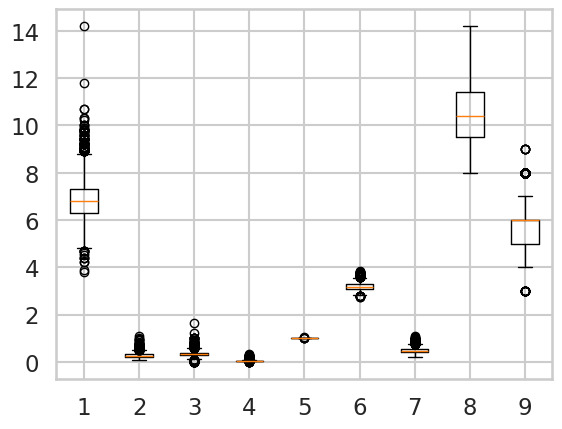

In [59]:
# C. (gráfico de cajas y bigotes por atributo, diagrama de dispersión u otro diagrama acorde al tipo del atributo que ilustre el comportamiento de los datos)

plt.boxplot((w_wine['fixed acidity'],w_wine['volatile acidity'],w_wine['citric acid'], w_wine['chlorides'],w_wine['density'],w_wine['pH'], w_wine['sulphates'],w_wine['alcohol'], w_wine['quality']))
plt.show()

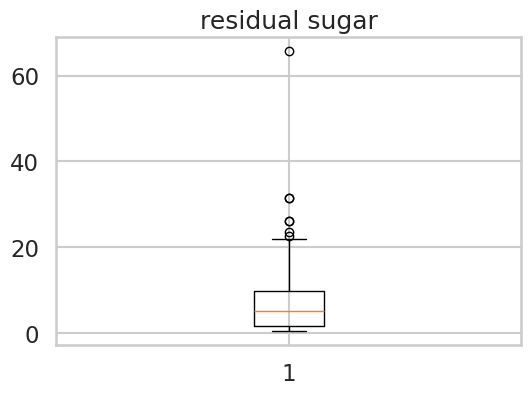

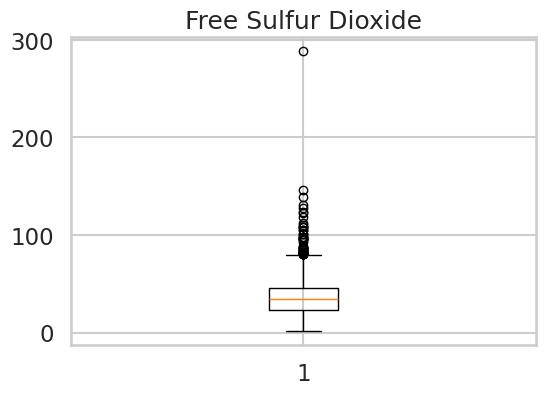

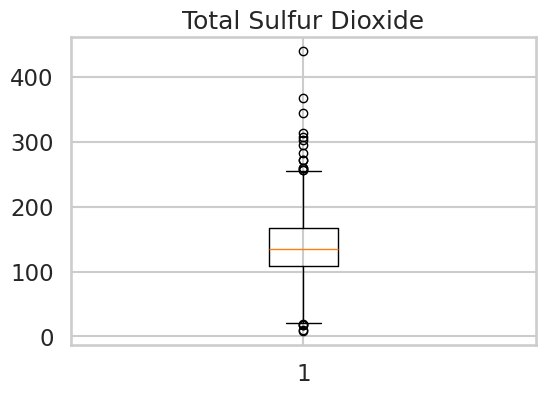

In [60]:
# Boxplot para 'residual sugar'
plt.figure(figsize=(6, 4))  # Crear una nueva figura
plt.boxplot(w_wine['residual sugar'])
plt.title('residual sugar')
plt.show()

# Boxplot para 'free sulfur dioxide'
plt.figure(figsize=(6, 4))  # Crear una nueva figura
plt.boxplot(w_wine['free sulfur dioxide'])
plt.title('Free Sulfur Dioxide')
plt.show()

# Boxplot para 'total sulfur dioxide'
plt.figure(figsize=(6, 4))  # Crear otra figura
plt.boxplot(w_wine['total sulfur dioxide'])
plt.title('Total Sulfur Dioxide')
plt.show()

Observaciones: Debido a que los datos de las ultimas tres graficas presentan una alta dispersión, se requerira escalarlos para no hacer sensible el modelo.


In [61]:
# Calcular la matriz de correlación entre los atributos de entrada
# Permite detectar si hay atributos redundantes (correlación mayor a 0.85 o menor a -0.85)
w_wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


In [62]:
# E. Contar cuántos vinos hay por cada categoría de calidad
quality_counts = w_wine['quality'].value_counts().sort_index()
print(quality_counts)

quality
3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
Name: count, dtype: int64


Distribución de la variable objetivo (quality):
quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64

Porcentajes de cada clase:
quality
6    44.875459
5    29.746835
7    17.966517
8     3.572887
4     3.327889
3     0.408330
9     0.102082
Name: count, dtype: float64


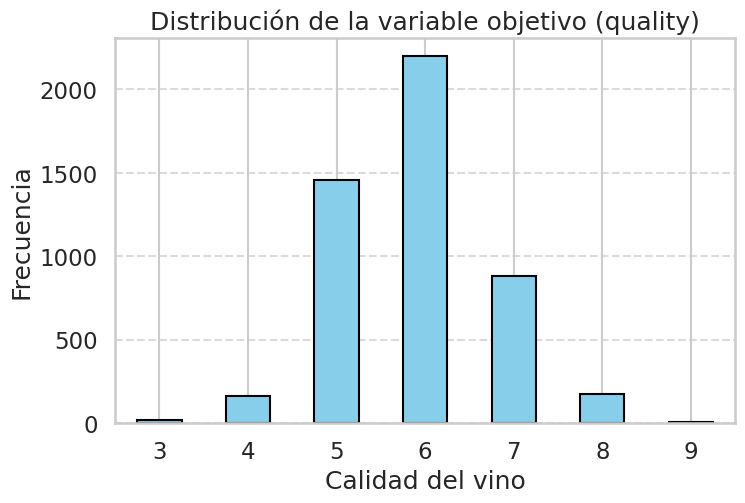

In [75]:
# Contar la cantidad de registros por cada valor en la columna 'quality'
quality_counts = w_wine['quality'].value_counts()

# Calcular el porcentaje de cada clase
quality_percentages = (quality_counts / len(w_wine)) * 100

# Mostrar los resultados
print("Distribución de la variable objetivo (quality):")
print(quality_counts)
print("\nPorcentajes de cada clase:")
print(quality_percentages)

# Visualización con un gráfico de barras
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
quality_counts.sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel("Calidad del vino")
plt.ylabel("Frecuencia")
plt.title("Distribución de la variable objetivo (quality)")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [63]:
# F. Cual es el máximo de datos faltantes en un mismo registro?
# Si hay registros a los que les faltan muchos valores, es mejor eliminarlos.
max(w_wine.isnull().sum(axis=1))

0

In [64]:
#Cuantos datos faltantes hay por cada atributo?
w_wine.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [65]:
# Instalar pyOD
!pip install pyod

In [66]:
from pyod.models.iforest import IForest
# Entrenar Isolation Forest para detectar outliers
w_wine_pyod = w_wine.copy()
clf = IForest(contamination=0.05, random_state=42)  # Ajusta el porcentaje de outliers si es necesario
clf.fit(w_wine_pyod)

# Obtener etiquetas de outliers (1 = atípico, 0 = normal)
w_wine_pyod['outlier'] = clf.labels_

# Mostrar cantidad de atípicos detectados
print(f"Cantidad de datos atípicos: {w_wine_pyod['outlier'].sum()}")

# Filtrar y mostrar los datos atípicos
outliers = w_wine_pyod[w_wine_pyod['outlier'] == 1]
print(outliers)


Cantidad de datos atípicos: 245
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
14              8.3             0.420         0.62           19.25      0.040   
17              6.2             0.660         0.48            1.20      0.029   
20              6.2             0.660         0.48            1.20      0.029   
98              9.8             0.360         0.46           10.50      0.038   
111             7.2             0.270         0.46           18.75      0.052   
...             ...               ...          ...             ...        ...   
4839            5.2             0.405         0.15            1.45      0.038   
4847            4.4             0.540         0.09            5.10      0.038   
4867            5.3             0.600         0.34            1.40      0.031   
4877            5.9             0.540         0.00            0.80      0.032   
4887            6.2             0.410         0.22            1.90      0.023

 2. ENTRENAMIENTO DE MODELOS

  A. Conjunto original (Transformando datos categóricos, si aplica).

  B. Conjunto sin datos faltantes. (No aplica)

  C. Conjunto sin datos faltantes ni atípicos.

  D. Conjunto sin datos faltantes, ni atípicos, ni correlacionados

  E. Conjunto obtenido en el paso 5 y aplicando PCA

In [67]:
# A. Conjunto original (Transformando datos categóricos, si aplica).
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Separar las características (X) y la variable objetivo (y)
X = w_wine.drop(columns=['quality'])
y = w_wine['quality']

# Escalar las características (normalización)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
print("\nTamaño de los conjuntos de datos:")
print(f"Entrenamiento: {X_train.shape}, Prueba: {X_test.shape}")

# Crear el modleo de regresión logistica.
model = LogisticRegression(random_state=42, max_iter=3400)

# Entrenar el modelo con el conjunto de entrenamiento
model.fit(X_train, y_train)

print("\nModelo entrenado con éxito.")

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

print("Primeras 10 predicciones:    ", y_pred[:20])
print("Primeras 10 etiquetas reales:", y_test[:20].values)

# Evaluar el desempeño del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"\nExactitud del modelo: {accuracy:.2f}")




Tamaño de los conjuntos de datos:
Entrenamiento: (3428, 11), Prueba: (1470, 11)

Modelo entrenado con éxito.
Primeras 10 predicciones:     [6 6 6 6 6 6 5 5 6 5 6 5 6 6 6 6 6 6 6 5]
Primeras 10 etiquetas reales: [7 8 8 5 7 6 5 4 6 5 7 5 7 6 5 5 8 5 7 6]

Exactitud del modelo: 0.54


In [70]:
# Crear un nuevo DataFrame sin los datos atípicos
w_wine_watipicos = w_wine_pyod[w_wine_pyod['outlier'] == 0].drop(columns=['outlier'])

# Mostrar información sobre el nuevo dataset
print(f"Cantidad de datos originales: {w_wine_pyod.shape[0]}")
print(f"Cantidad de datos después de eliminar atípicos: {w_wine_watipicos.shape[0]}")


Cantidad de datos originales: 4898
Cantidad de datos después de eliminar atípicos: 4653


In [71]:
# Modelo para datos atipicos
# Separar las características (X) y la variable objetivo (y)
X = w_wine_watipicos.drop(columns=['quality'])
y = w_wine_watipicos['quality']

# Escalar las características (normalización)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
print("\nTamaño de los conjuntos de datos:")
print(f"Entrenamiento: {X_train.shape}, Prueba: {X_test.shape}")

# Crear el modleo de regresión logistica.
model = LogisticRegression(random_state=42, max_iter=3400)

# Entrenar el modelo con el conjunto de entrenamiento
model.fit(X_train, y_train)

print("\nModelo entrenado con éxito.")

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

print("Primeras 10 predicciones:    ", y_pred[:20])
print("Primeras 10 etiquetas reales:", y_test[:20].values)

# Evaluar el desempeño del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"\nExactitud del modelo: {accuracy:.2f}")


Tamaño de los conjuntos de datos:
Entrenamiento: (3257, 11), Prueba: (1396, 11)

Modelo entrenado con éxito.
Primeras 10 predicciones:     [6 6 6 6 6 5 6 6 6 5 6 6 5 6 6 5 6 6 6 5]
Primeras 10 etiquetas reales: [6 6 6 6 5 6 7 8 5 6 5 7 5 5 6 5 6 7 7 5]

Exactitud del modelo: 0.52


In [72]:
# Eliminar variables altamente correlacionadas
correlation_matrix = w_wine_watipicos.corr().abs()  # Matriz de correlación en valores absolutos
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))  # Triángulo superior
high_corr_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.9)]  # Columnas con correlación > 0.9

# Eliminar las columnas correlacionadas
w_wine_clean = w_wine_watipicos.drop(columns=high_corr_features)


In [74]:
# Modelo para datos atipicos, ni correlacionados.
# Separar las características (X) y la variable objetivo (y)
X = w_wine_clean.drop(columns=['quality'])
y = w_wine_clean['quality']

# Escalar las características (normalización)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
print("\nTamaño de los conjuntos de datos:")
print(f"Entrenamiento: {X_train.shape}, Prueba: {X_test.shape}")

# Crear el modelo de regresión logistica.
model = LogisticRegression(random_state=42, max_iter=3400)

# Entrenar el modelo con el conjunto de entrenamiento
model.fit(X_train, y_train)

print("\nModelo entrenado con éxito.")

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

print("Primeras 10 predicciones:    ", y_pred[:20])
print("Primeras 10 etiquetas reales:", y_test[:20].values)

# Evaluar el desempeño del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"\nExactitud del modelo: {accuracy:.2f}")


Tamaño de los conjuntos de datos:
Entrenamiento: (3257, 11), Prueba: (1396, 11)

Modelo entrenado con éxito.
Primeras 10 predicciones:     [6 6 6 6 6 5 6 6 6 5 6 6 5 6 6 5 6 6 6 5]
Primeras 10 etiquetas reales: [6 6 6 6 5 6 7 8 5 6 5 7 5 5 6 5 6 7 7 5]

Exactitud del modelo: 0.52


# 3. APLICAR PCA A LOS DATOS SIN CONVERTIRLOS A BINARIO LA VARIABLE A PREDECIR

A. Normalizar los datos (PCA requiere que las variables tengan la misma escala).

B. Aplicar PCA para reducir la dimensionalidad.

C. Seleccionar el número óptimo de componentes (varianza acumulada).

D. Entrenar el modelo de Regresión Logística con los datos transformados.

E. Evaluar el desempeño del modelo.

Componentes retenidos: 9


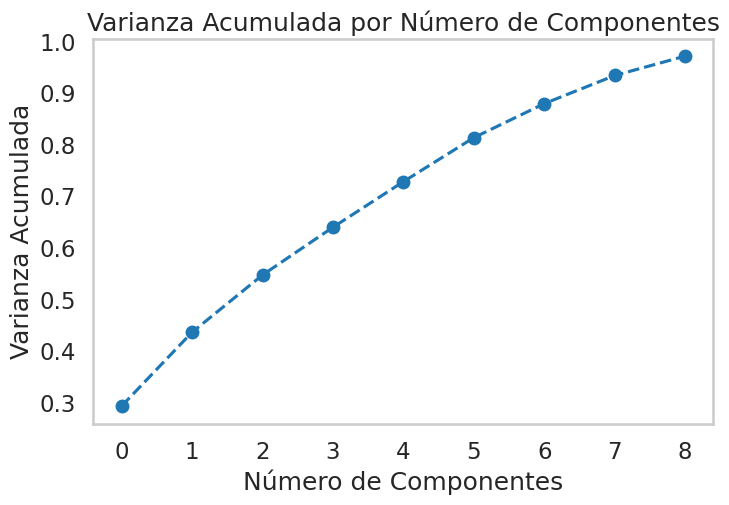


Exactitud del modelo sin PCA: 0.32


In [84]:
from sklearn.decomposition import PCA


# Normalizar los datos (PCA es sensible a escalas)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(w_wine.drop(columns=['quality']))  # Excluir la variable objetivo

# Aplicar PCA
pca = PCA(n_components=0.95)  # Retener el 95% de la varianza
X_pca = pca.fit_transform(X_scaled)

# Ver cuántos componentes se retuvieron
print(f"Componentes retenidos: {pca.n_components_}")

# Visualizar la varianza acumulada
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel("Número de Componentes")
plt.ylabel("Varianza Acumulada")
plt.title("Varianza Acumulada por Número de Componentes")
plt.grid()
plt.show()

# Separar datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_pca, w_wine['quality'], test_size=0.2, random_state=42)

# Entrenar el modelo de Regresión Logística
model = LogisticRegression(class_weight='balanced', max_iter=500, random_state=42)
model.fit(X_train, y_train)

# Evaluar el modelo
y_pred = model.predict(X_test)

# Métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
print(f"\nExactitud del modelo sin PCA: {accuracy:.2f}")

# 4. Debido a que la clasificación contiene mas de dos grados y esto representa un desbalance considerable en la variable objetivo, se procede a convertir el ejercicio en un problema binario, donde se indique que los vinos con puntuacion menor a 6 son malos y los de mayor o igual a 6 son buenos.

In [81]:
from imblearn.over_sampling import SMOTE

# SIN PCA

# Hacer una copia de w_wine
w_wine_b = w_wine.copy()

# Convertir quality en una variable binaria
w_wine_b['quality_binary'] = (w_wine_b['quality'] >= 6).astype(int)  # 0 = baja calidad, 1 = alta calidad

# Verificar el balance de clases
print(w_wine_b['quality_binary'].value_counts(normalize=True) * 100)

# Aplicar SMOTE para balancear las clases en el conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Ver distribución después de SMOTE
print("\nDistribución después del balanceo:")
print(pd.Series(y_train_balanced).value_counts(normalize=True) * 100)

# Separar variables predictoras y objetivo
X = w_wine_b.drop(columns=['quality', 'quality_binary'])  # Eliminamos la original y usamos la binaria
y = w_wine_b['quality_binary']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Estandarizar los datos (Regresión Logística requiere normalización)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar el modelo de Regresión Logística
model = LogisticRegression(class_weight='balanced', max_iter=500, random_state=42)
model.fit(X_train_scaled, y_train)

# Hacer predicciones
y_pred = model.predict(X_test_scaled)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"\nExactitud del modelo sin PCA: {accuracy:.2f}")

quality_binary
1    66.516946
0    33.483054
Name: proportion, dtype: float64

Distribución después del balanceo:
quality_binary
1    50.0
0    50.0
Name: proportion, dtype: float64

Exactitud del modelo: 0.72


In [82]:
# Aplicar PCA a los datos binarios para observar su rendimiento.

# Hacer una copia de w_wine
w_wine_bpca = w_wine.copy()

# Convertir quality en una variable binaria
w_wine_bpca['quality_binary'] = (w_wine_bpca['quality'] >= 6).astype(int)  # 0 = baja calidad, 1 = alta calidad

# Verificar el balance de clases
print(w_wine_bpca['quality_binary'].value_counts(normalize=True) * 100)

# Separar variables predictoras y objetivo
X = w_wine_bpca.drop(columns=['quality', 'quality_binary'])  # Eliminamos la original y usamos la binaria
y = w_wine_bpca['quality_binary']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Aplicar SMOTE para balancear las clases en el conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Ver distribución después de SMOTE
print("\nDistribución después del balanceo:")
print(pd.Series(y_train_balanced).value_counts(normalize=True) * 100)

# Estandarizar los datos (PCA y Regresión Logística requieren normalización)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

# Aplicar PCA para reducción de dimensionalidad
pca = PCA(n_components=0.95)  # Retiene el 95% de la varianza
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"\nNúmero de componentes principales seleccionados: {pca.n_components_}")

# Entrenar el modelo de Regresión Logística con datos reducidos
model = LogisticRegression(class_weight='balanced', max_iter=500, random_state=42)
model.fit(X_train_pca, y_train_balanced)

# Hacer predicciones
y_pred = model.predict(X_test_pca)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"\nExactitud del modelo con PCA: {accuracy:.2f}")


quality_binary
1    66.516946
0    33.483054
Name: proportion, dtype: float64

Distribución después del balanceo:
quality_binary
1    50.0
0    50.0
Name: proportion, dtype: float64

Número de componentes principales seleccionados: 9

Exactitud del modelo con PCA: 0.72



# RESULTADOS

Modelos Evaluados

1. Conjunto de Datos Original → 0.54
2. Sin Datos Faltantes → 0.54
3. Sin Datos Faltantes ni Atípicos → 0.52
4. Sin Datos Faltantes, Atípicos ni Correlacionados → 0.52
5. Aplicando PCA al Conjunto Preprocesado → 0.32
6. Conversión Binaria y Balanceo, sin PCA → 0.72
7. Conversión Binaria y Balanceo, con PCA → 0.72

# Conclusiones
Se observa un marcado desbalance en la variable objetivo, lo que impacta negativamente en el desempeño del modelo. Este problema se ve reforzado por la disminución en la precisión al aplicar PCA, lo que sugiere que la cantidad de atributos en los datos es limitada.

Para mejorar los resultados, se optó por transformar la variable objetivo en un modelo de clasificación binaria, lo que permitió un aumento significativo en la precisión, tanto con como sin PCA. Esto indica que los datos originales pueden no ser adecuados para la tarea de predicción planteada o que el modelo empleado no es el más apropiado. Además, el uso de PCA no resultó beneficioso en este contexto.
